Buatlah program python dengan memanfaatkan imageio, numpy dan matplotlib untuk mengimplementasikan konsep deteksi tepi dengan menggunakan model Robert, kemudian bandingkan hasilnya dengan operator Sobel, lakukan analisa.

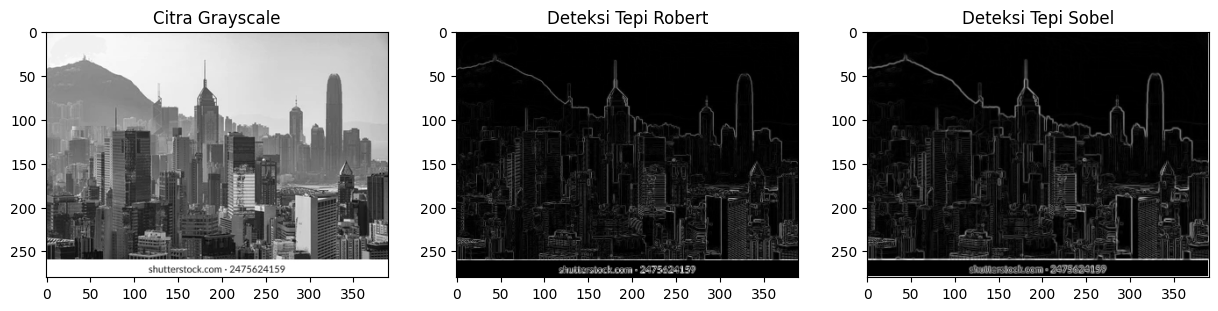

In [2]:
# NAMA : Fandi Chriswantoro Putro
# NIM : 200401010074
# Makul : Pengolahan Citra Digital (IFD51)

# Instal imageio, numpy dan matplotlib
!pip install imageio==2.28.1 numpy==1.26.0 matplotlib==3.8.0

# Import libary python
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import ndimage
from skimage.morphology import dilation, square
from skimage.color import rgb2gray

# Baca gambar menggunakan imageio
img = iio.imread('/content/kota.jpg')

# Konversi ke grayscale menggunakan skimage.color.rgb2gray
img_gray = rgb2gray(img)

# Fungsi Operator Robert
def robert_operator(img):
  robert_x = np.array([[1, 0], [0, -1]])
  robert_y = np.array([[0, 1], [-1, 0]])

  grad_x = signal.convolve2d(img, robert_x, mode='same', boundary='symm')
  grad_y = signal.convolve2d(img, robert_y, mode='same', boundary='symm')

  grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

  return grad_magnitude

  # Fungsi Operator Sobel
def sobel_operator(img):
  grad_x = ndimage.sobel(img, axis=0, mode='constant')
  grad_y = ndimage.sobel(img, axis=1, mode='constant')

  grad_magnitude = np.hypot(grad_x, grad_y)

  return grad_magnitude

  # Menampilkan hasil visualisasi
robert_edges = robert_operator(img_gray)
sobel_edges = sobel_operator(img_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(1, 3, 2)
plt.imshow(robert_edges, cmap='gray')
plt.title('Deteksi Tepi Robert')

plt.subplot(1, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Deteksi Tepi Sobel')

plt.show()

## **Analisis**

Setelah gambar di import, citra gambar berwarna (RGB) dikonversi menjadi citra grayscale (abu-abu). Citra grayscale hanya memiliki satu channel (intensitas cahaya), sedangkan citra berwarna memiliki tiga channel (merah, hijau, biru). Dengan mengkonversi ke grayscale, jumlah data yang diproses berkurang, sehingga mempercepat komputasi deteksi tepi.
Dari perbandingan visual yang dihasilkan oleh metode deteksi tepi anatara operator robert dan sobel dihasilkan:
1. *Operator Robert* menghasilkan deteksi tepi yang tipis dan kurang jelas, terutama pada tepi yang tidak terlalu kuat. Operator ini lebih sensitif terhadap noise dan menghasilkan banyak tepi palsu.
2. *Operator Sobel* menghasilkan deteksi tepi yang lebih tebal dan jelas dibandingkan Robert. Operator ini kurang sensitif terhadap noise dan menghasilkan lebih sedikit tepi palsu. Tepi yang dihasilkan juga lebih halus dan kontinu.

Dapat disimpulkan bahwa, operator Sobel memberikan hasil yang lebih baik untuk deteksi tepi dibandingkan operator Robert, terutama pada citra yang mengandung noise. Sobel menghasilkan tepi yang lebih jelas dan tebal, serta mengurangi tepi palsu. Namun, operator Robert dapat menjadi pilihan jika kecepatan komputasi menjadi prioritas utama.